<a href="https://colab.research.google.com/github/desstaw/Generating-Tabular-Data-using-LLMs-and-GANs/blob/main/Synthetic_Datasets_Analysis_Stroke.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
url1 = 'https://raw.githubusercontent.com/desstaw/Generating-Tabular-Data-using-LLMs-and-GANs/main/stroke.csv'
stroke = pd.read_csv(url1)

url2 = 'https://raw.githubusercontent.com/desstaw/Generating-Tabular-Data-using-LLMs-and-GANs/main/great_stroke.csv'
great_stroke = pd.read_csv(url2)

url3 = 'https://raw.githubusercontent.com/desstaw/Generating-Tabular-Data-using-LLMs-and-GANs/main/great_custom_stroke.csv'
great_custom_stroke = pd.read_csv(url3)

url4 = 'https://raw.githubusercontent.com/desstaw/Generating-Tabular-Data-using-LLMs-and-GANs/main/ctgans_stroke.csv'
ctgans_stroke = pd.read_csv(url4)

In [ ]:
stroke.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [ ]:
great_stroke = great_stroke.drop("id", axis=1)
great_custom_stroke = great_custom_stroke.drop("id", axis=1)
stroke = stroke.drop("id", axis=1)
#ctgans_hepatitisC = ctgans_hepatitisC.drop("Unnamed: 0", axis=1)

In [ ]:
# Define sensitive attribute and target variable
sensitive_attribute = 'gender'
target_variable = 'stroke'

## Fairness comparison between the original and th3 synthetic datasets

In [ ]:
from scipy import stats

# Calculate Statistical Parity for Sex
def statistical_parity(data, protected_attr, target_attr):
    crosstab = pd.crosstab(data[protected_attr], data[target_attr])
    chi2, p, _, _ = stats.chi2_contingency(crosstab)
    return chi2, p

# Calculate Disparate Impact for Sex
def disparate_impact(data, protected_attr, target_attr):
    crosstab = pd.crosstab(data[protected_attr], data[target_attr])
    impact = crosstab.min(axis=0) / crosstab.max(axis=0)
    return impact

# Calculate fairness metrics for BE-GET and CTGAN datasets
chi2_beget, p_original = statistical_parity(stroke, sensitive_attribute, target_variable)
impact_original = disparate_impact(stroke, sensitive_attribute, target_variable)

chi2_ctgan, p_great = statistical_parity(great_stroke, sensitive_attribute, target_variable)
impact_great = disparate_impact(great_stroke, sensitive_attribute, target_variable)

chi2_ctgan, p_great_custom = statistical_parity(great_custom_stroke, sensitive_attribute, target_variable)
impact_great_custom = disparate_impact(great_custom_stroke, sensitive_attribute, target_variable)

chi2_ctgan, p_ctgans = statistical_parity(ctgans_stroke, sensitive_attribute, target_variable)
impact_ctgans = disparate_impact(ctgans_stroke, sensitive_attribute, target_variable)

print("Fairness Metrics for Original dataset:")
print(f"Statistical Parity (Chi-Squared Test p-value): {p_original}")
print(f"Disparate Impact: {impact_original}\n")

print("Fairness Metrics for be-great:")
print(f"Statistical Parity (Chi-Squared Test p-value): {p_great}")
print(f"Disparate Impact: {impact_great}\n")

print("Fairness Metrics for be-great with constrains:")
print(f"Statistical Parity (Chi-Squared Test p-value): {p_great_custom}")
print(f"Disparate Impact: {impact_great_custom}\n")

print("Fairness Metrics for CTGANs:")
print(f"Statistical Parity (Chi-Squared Test p-value): {p_ctgans}")
print(f"Disparate Impact: {impact_ctgans}\n")

Fairness Metrics for Original dataset:
Statistical Parity (Chi-Squared Test p-value): 0.7895490538408245
Disparate Impact: stroke
0    0.000351
1    0.000000
dtype: float64

Fairness Metrics for be-great:
Statistical Parity (Chi-Squared Test p-value): 0.27977354669820276
Disparate Impact: stroke
0.0    0.614267
1.0    0.720930
dtype: float64

Fairness Metrics for be-great with constrains:
Statistical Parity (Chi-Squared Test p-value): 7.535362349385567e-07
Disparate Impact: stroke
0.0    0.992082
1.0    0.762228
dtype: float64

Fairness Metrics for CTGANs:
Statistical Parity (Chi-Squared Test p-value): 4.921708494734152e-07
Disparate Impact: stroke
0    0.002223
1    0.000000
dtype: float64



In [ ]:
great_custom_stroke.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                3832 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   float64
dtypes: float64(4), int64(2), object(5)
memory usage: 439.3+ KB


## Classification

In [ ]:
!pip install catboost
!pip install fairlearn

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from catboost import CatBoostClassifier

def classify_dataset(dataset, sensitive_attribute, target_variable):

    sensitive_attribute = 'gender'
    target_variable = 'stroke'

    X = dataset.drop(columns=[target_variable])
    y = dataset[target_variable]




    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Convert categorical features to strings
    categorical_features_indices = X.select_dtypes(include=['object']).columns


    catboost_model = CatBoostClassifier(iterations=100, depth=6, learning_rate=0.1, random_state=42, cat_features=list(categorical_features_indices))

    catboost_model.fit(X_train, y_train, cat_features=list(categorical_features_indices))

    y_pred = catboost_model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    classification_metrics = classification_report(y_test, y_pred)



    return accuracy, classification_metrics, y_pred, y_test


# Classify each dataset
accuracy_original, metrics_original, y_pred_original, y_test_original = classify_dataset(stroke, sensitive_attribute, target_variable)
accuracy_synthetic1, metrics_synthetic1, y_pred_synthetic1, y_test_synthetic1 = classify_dataset(great_stroke, sensitive_attribute, target_variable)
accuracy_synthetic2, metrics_synthetic2, y_pred_synthetic2, y_test_synthetic2 = classify_dataset(great_custom_stroke, sensitive_attribute, target_variable)
accuracy_synthetic3, metrics_synthetic3, y_pred_synthetic3, y_test_synthetic3 = classify_dataset(ctgans_stroke, sensitive_attribute, target_variable)




# Print classification results
print("Classification Results (Original Dataset):")
print(f"Accuracy: {accuracy_original}")
print("Classification Metrics:")
print(metrics_original)

print("Classification Results (be-GReaT):")
print(f"Accuracy: {accuracy_synthetic1}")
print("Classification Metrics:")
print(metrics_synthetic1)

print("Classification Results (be-GReaT with constrain):")
print(f"Accuracy: {accuracy_synthetic2}")
print("Classification Metrics:")
print(metrics_synthetic2)


print("Classification Results CTGANs):")
print(f"Accuracy: {accuracy_synthetic3}")
print("Classification Metrics:")
print(metrics_synthetic3)

0:	learn: 0.6182415	total: 65.1ms	remaining: 6.44s
1:	learn: 0.5567032	total: 76ms	remaining: 3.72s
2:	learn: 0.5040162	total: 86.3ms	remaining: 2.79s
3:	learn: 0.4593266	total: 97.1ms	remaining: 2.33s
4:	learn: 0.4220053	total: 119ms	remaining: 2.26s
5:	learn: 0.3883197	total: 132ms	remaining: 2.06s
6:	learn: 0.3622232	total: 150ms	remaining: 1.99s
7:	learn: 0.3368467	total: 166ms	remaining: 1.91s
8:	learn: 0.3148033	total: 179ms	remaining: 1.81s
9:	learn: 0.2953655	total: 194ms	remaining: 1.75s
10:	learn: 0.2784543	total: 204ms	remaining: 1.65s
11:	learn: 0.2636143	total: 207ms	remaining: 1.52s
12:	learn: 0.2508882	total: 217ms	remaining: 1.45s
13:	learn: 0.2395264	total: 230ms	remaining: 1.41s
14:	learn: 0.2291427	total: 238ms	remaining: 1.35s
15:	learn: 0.2198578	total: 244ms	remaining: 1.28s
16:	learn: 0.2121719	total: 254ms	remaining: 1.24s
17:	learn: 0.2047938	total: 262ms	remaining: 1.19s
18:	learn: 0.1980064	total: 275ms	remaining: 1.17s
19:	learn: 0.1929110	total: 282ms	remai

## Classification fairness comparison

In [ ]:
from sklearn.metrics import confusion_matrix

def calculate_fairness_metrics( y_true, y_pred, sensitive_attribute):
    # Create a confusion matrix
    cm = confusion_matrix(y_true, y_pred)

    # Extract TP, FP, TN, FN
    TP = cm[1, 1]
    FP = cm[0, 1]
    TN = cm[0, 0]
    FN = cm[1, 0]

    # False Positive Rate (FPR)
    fpr = FP / (FP + TN)

    # False Negative Rate (FNR)
    fnr = FN / (FN + TP)

    # Selection Rate (SR)
    sr = (TP + FP) / (TP + FP + TN + FN)

    # Demographic Parity (DP)
    dp = abs(fpr - fnr)

    return fpr, fnr, sr, dp


# Calculate fairness metrics for each dataset
fpr_original, fnr_original, sr_original, dp_original = calculate_fairness_metrics(y_test_original, y_pred_original, sensitive_attribute)

# Calculate fairness metrics for the synthetic dataset 1
fpr_synthetic1, fnr_synthetic1, sr_synthetic1, dp_synthetic1 = calculate_fairness_metrics(y_test_synthetic1, y_pred_synthetic1, sensitive_attribute)

# Calculate fairness metrics for the synthetic dataset 2
fpr_synthetic2, fnr_synthetic2, sr_synthetic2, dp_synthetic2 = calculate_fairness_metrics(y_test_synthetic2, y_pred_synthetic2, sensitive_attribute)

# Calculate fairness metrics for the synthetic dataset 3
fpr_synthetic3, fnr_synthetic3, sr_synthetic3, dp_synthetic3 = calculate_fairness_metrics(y_test_synthetic3, y_pred_synthetic3, sensitive_attribute)

# Print fairness metrics
print("Fairness Metrics for Stroke Dataset:")
print(f"False Positive Rate (FPR): {fpr_original}")
print(f"False Negative Rate (FNR): {fnr_original}")
print(f"Selection Rate (SR): {sr_original}")
print(f"Demographic Parity (DP): {dp_original}")

print("\nFairness Metrics for be-GReaT Stroke:")
print(f"False Positive Rate (FPR): {fpr_synthetic1}")
print(f"False Negative Rate (FNR): {fnr_synthetic1}")
print(f"Selection Rate (SR): {sr_synthetic1}")
print(f"Demographic Parity (DP): {dp_synthetic1}")

print("\nFairness Metrics for be-GReaT Stroke with constrains:")
print(f"False Positive Rate (FPR): {fpr_synthetic2}")
print(f"False Negative Rate (FNR): {fnr_synthetic2}")
print(f"Selection Rate (SR): {sr_synthetic2}")
print(f"Demographic Parity (DP): {dp_synthetic2}")

print("\nFairness Metrics for CTGANs Stroke:")
print(f"False Positive Rate (FPR): {fpr_synthetic3}")
print(f"False Negative Rate (FNR): {fnr_synthetic3}")
print(f"Selection Rate (SR): {sr_synthetic3}")
print(f"Demographic Parity (DP): {dp_synthetic3}")

Fairness Metrics for Stroke Dataset:
False Positive Rate (FPR): 0.0
False Negative Rate (FNR): 0.9838709677419355
Selection Rate (SR): 0.0009784735812133072
Demographic Parity (DP): 0.9838709677419355

Fairness Metrics for be-GReaT Stroke:
False Positive Rate (FPR): 0.0040858018386108275
False Negative Rate (FNR): 0.9302325581395349
Selection Rate (SR): 0.00684931506849315
Demographic Parity (DP): 0.926146756300924

Fairness Metrics for be-GReaT Stroke with constrains:
False Positive Rate (FPR): 0.1065891472868217
False Negative Rate (FNR): 0.08893280632411067
Selection Rate (SR): 0.5048923679060665
Demographic Parity (DP): 0.01765634096271103

Fairness Metrics for CTGANs Stroke:
False Positive Rate (FPR): 0.03863134657836645
False Negative Rate (FNR): 0.6637931034482759
Selection Rate (SR): 0.07240704500978473
Demographic Parity (DP): 0.6251617568699095


##Data Quality

In [ ]:
#!pip install table-evaluator

###hepatitisC vs great_hepatitisC

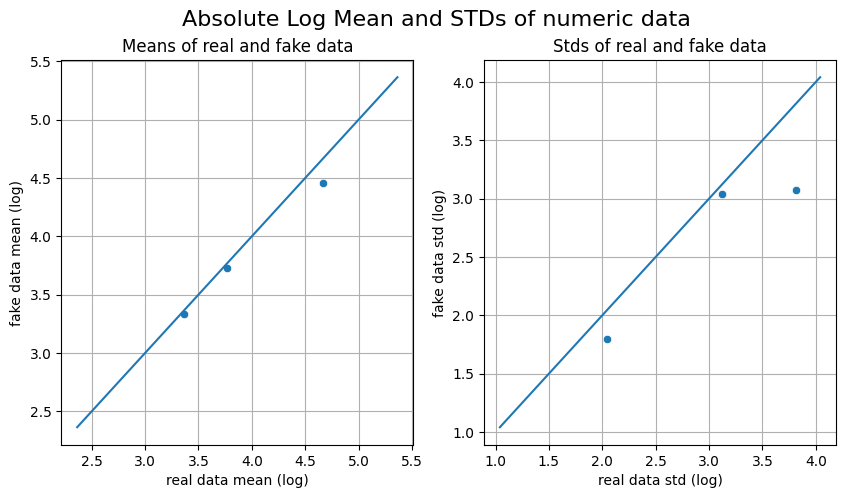

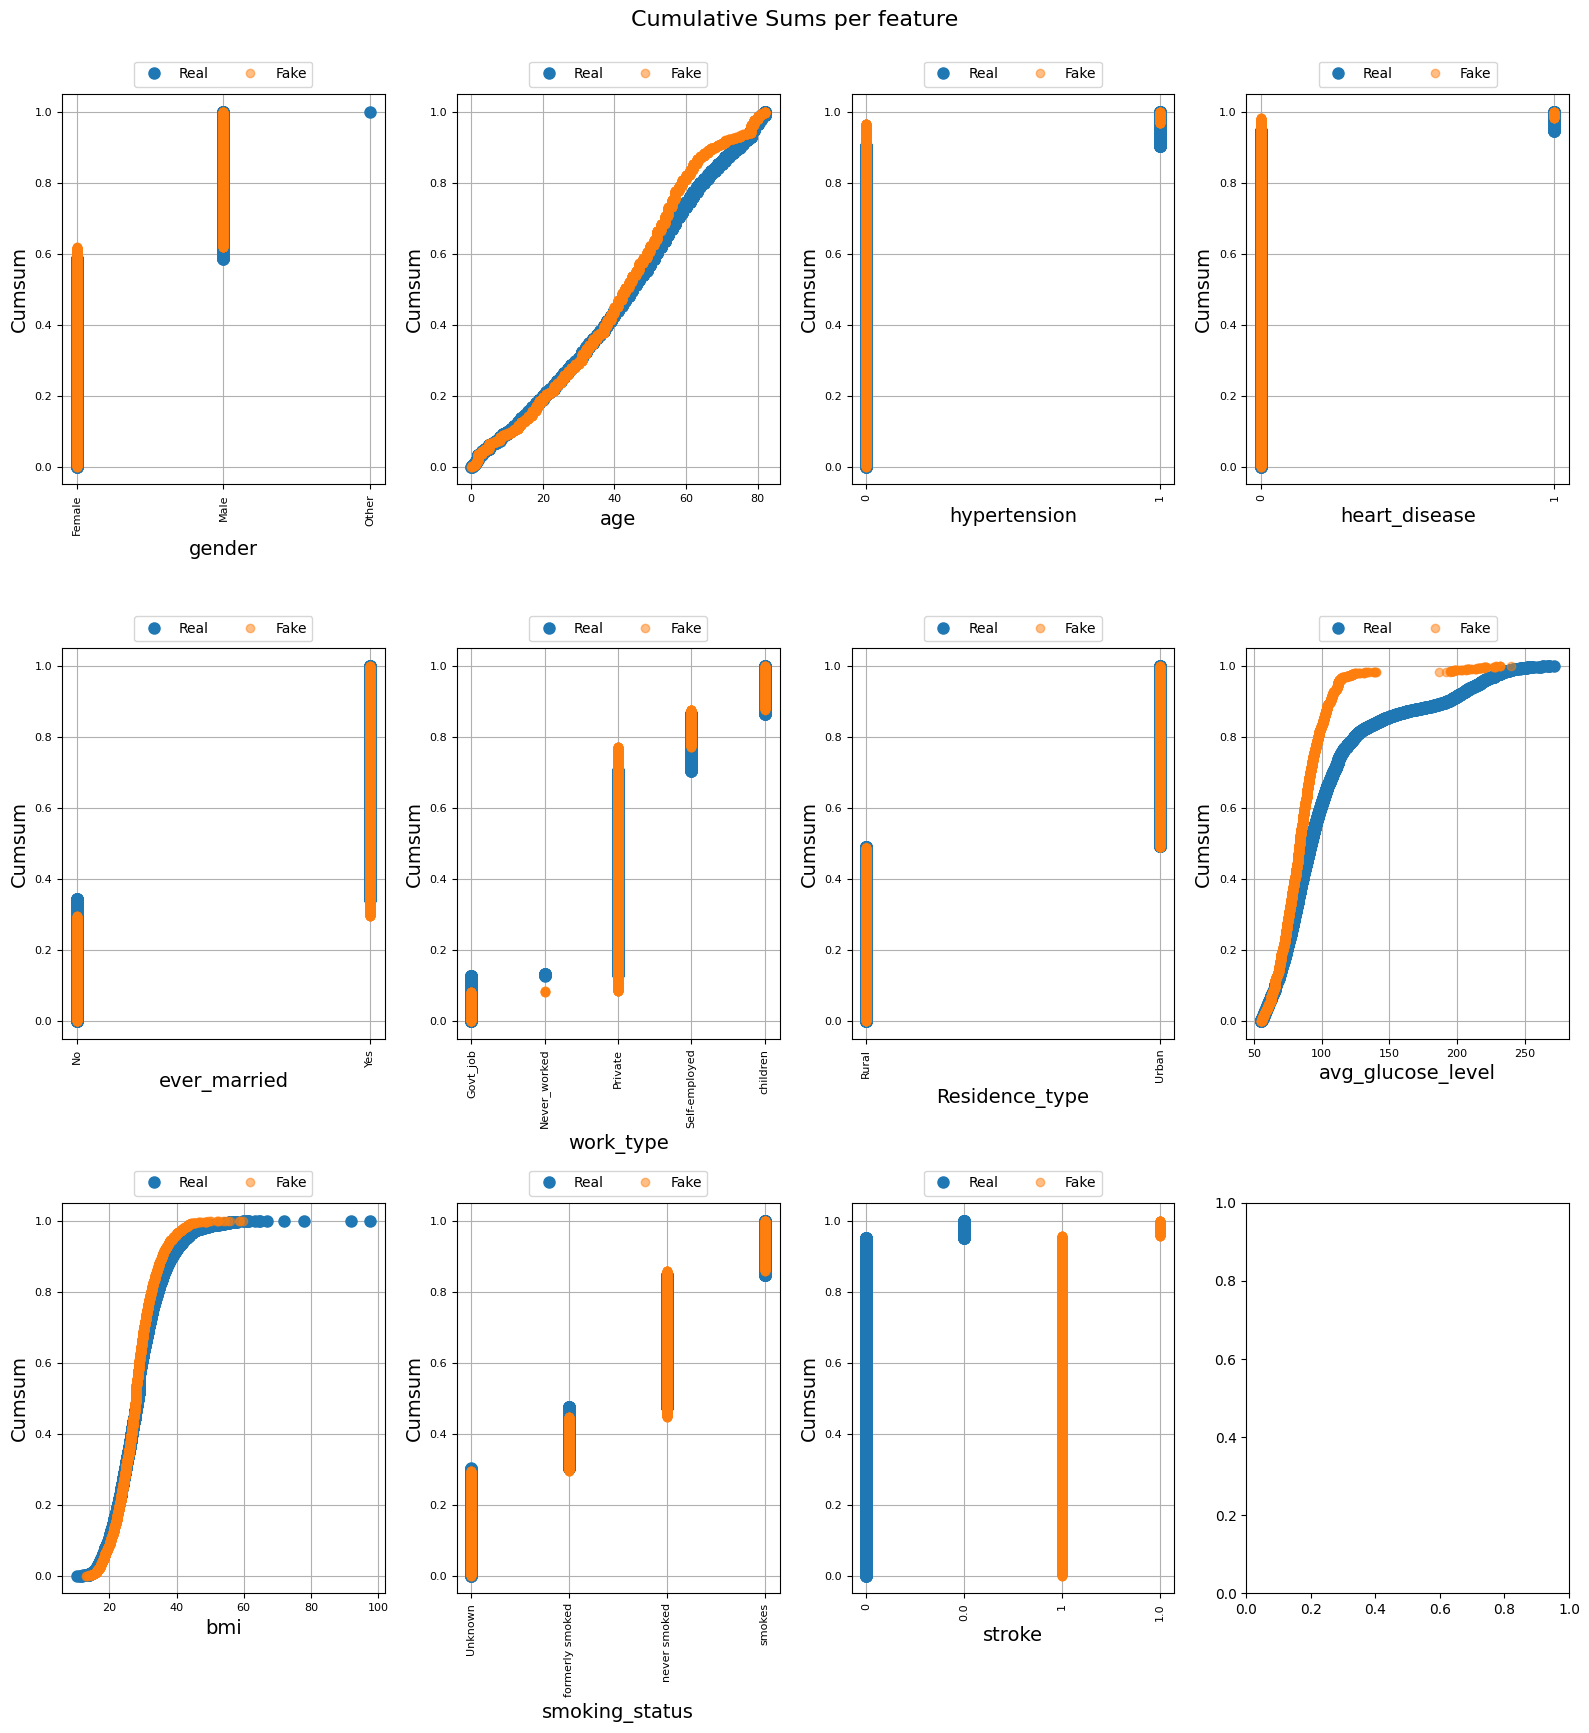

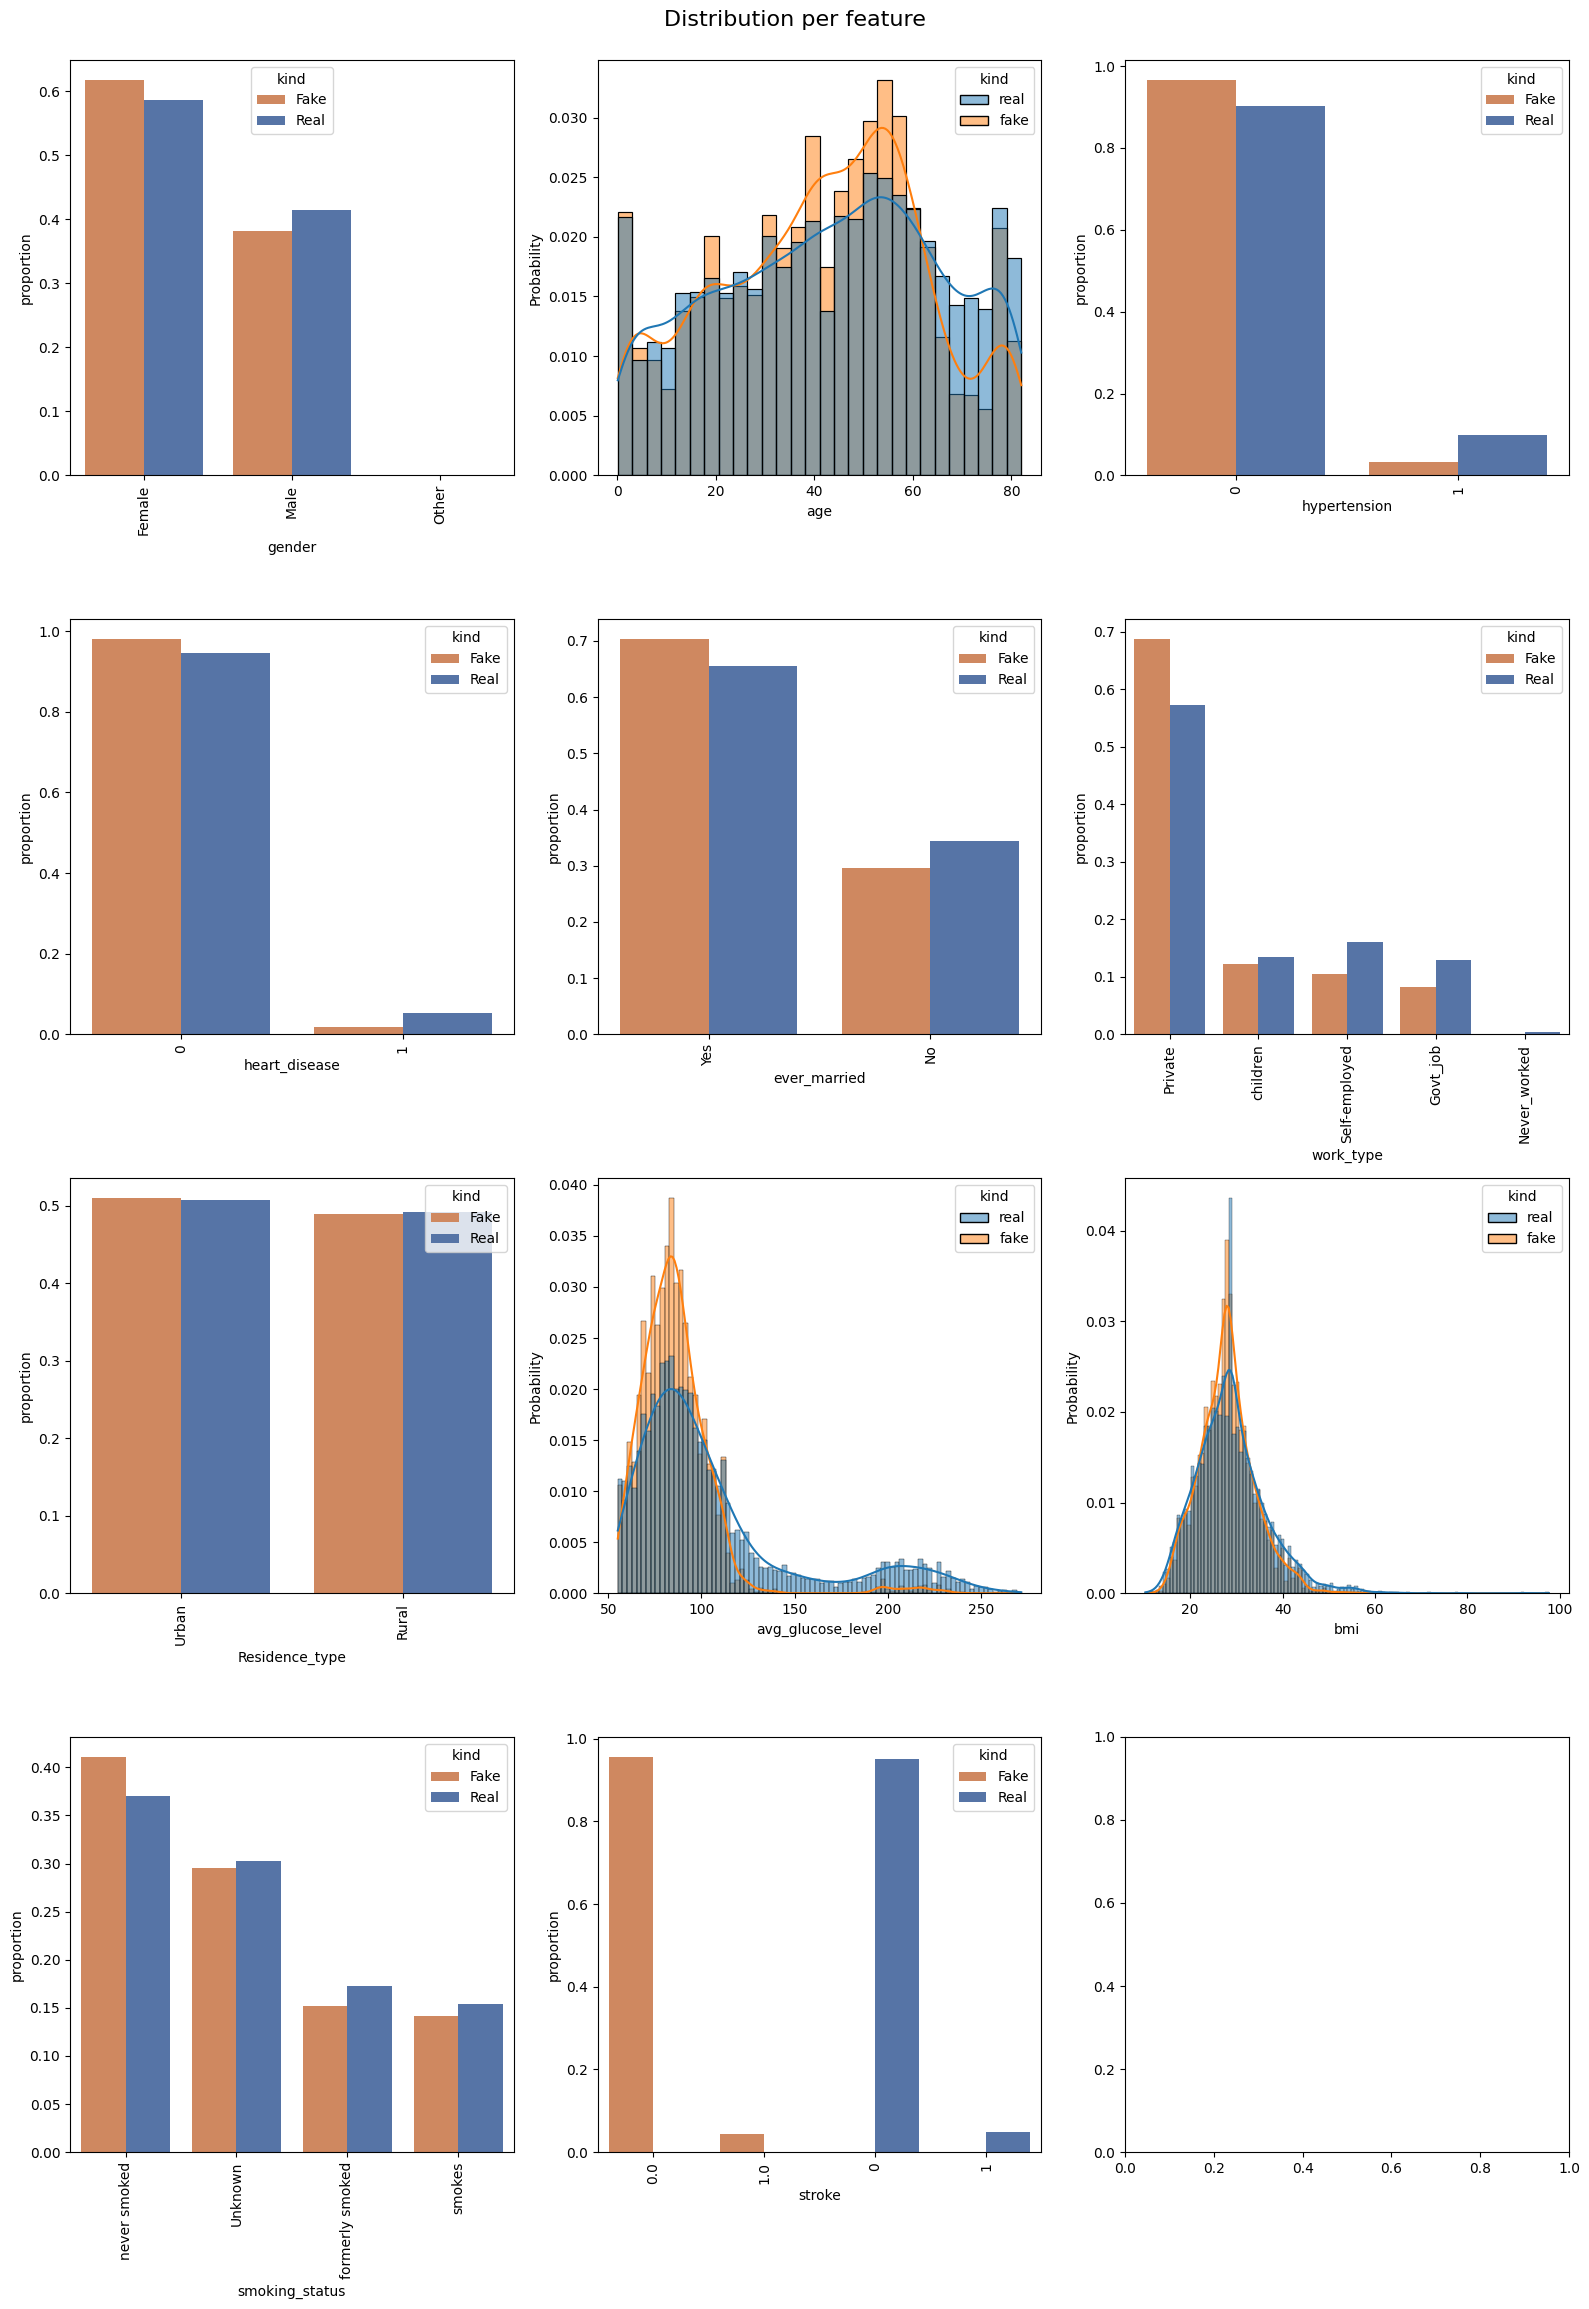

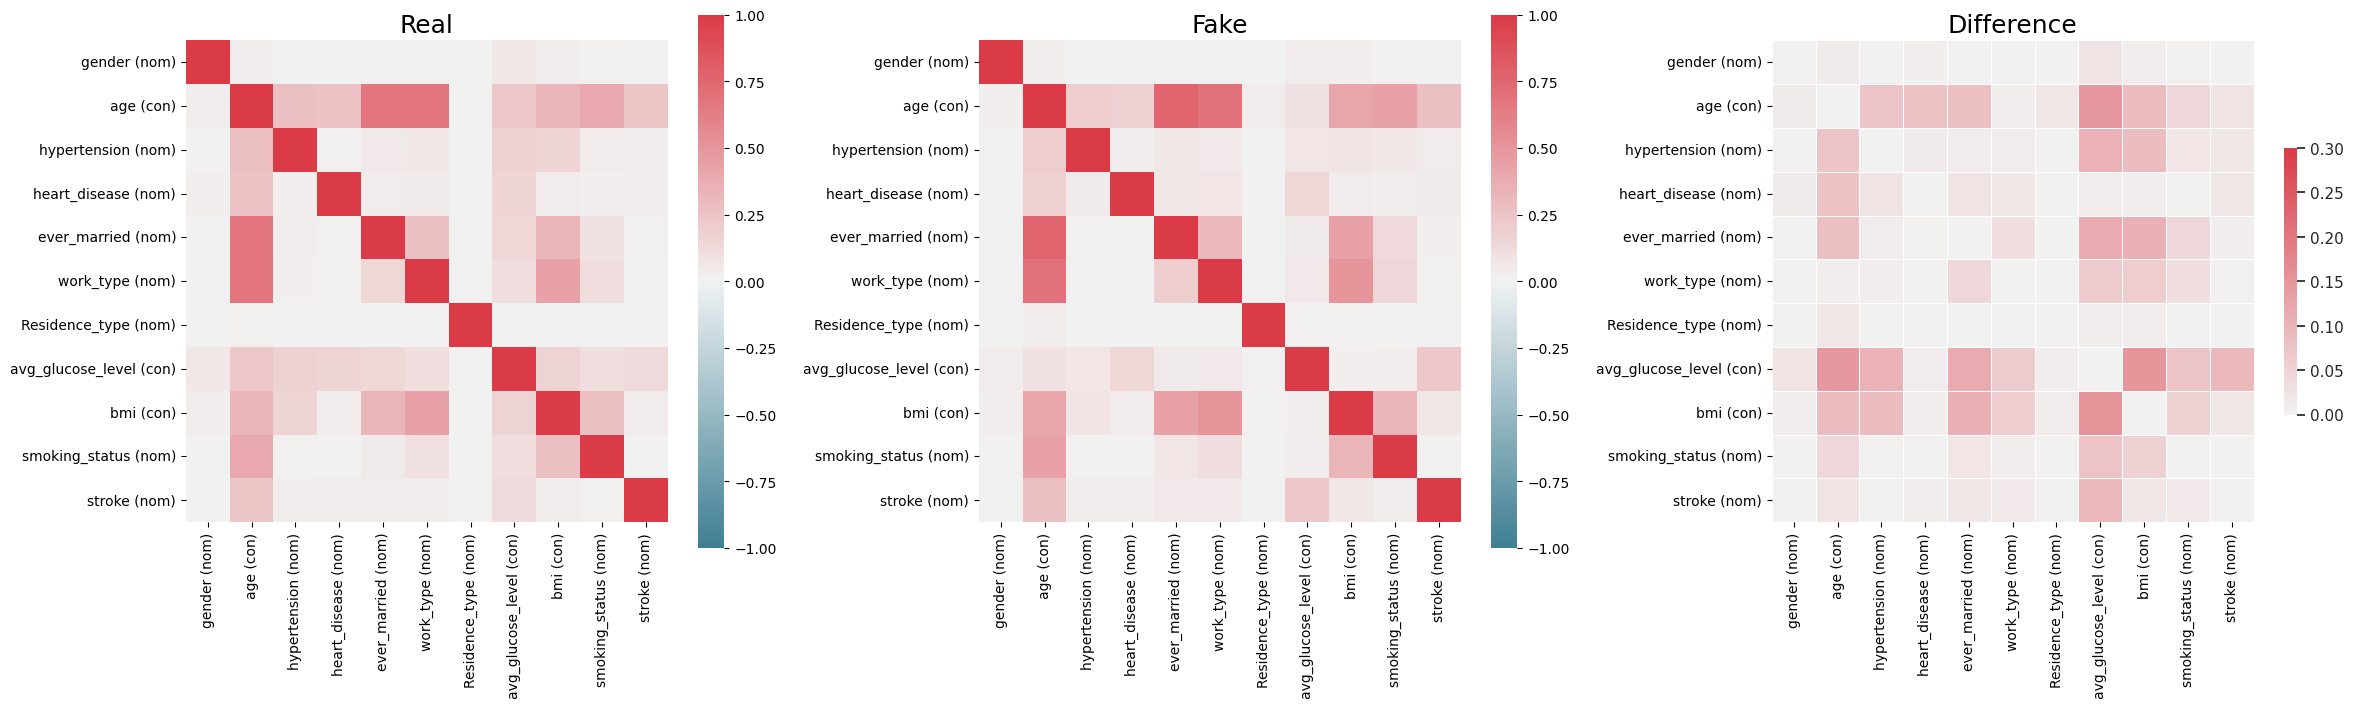

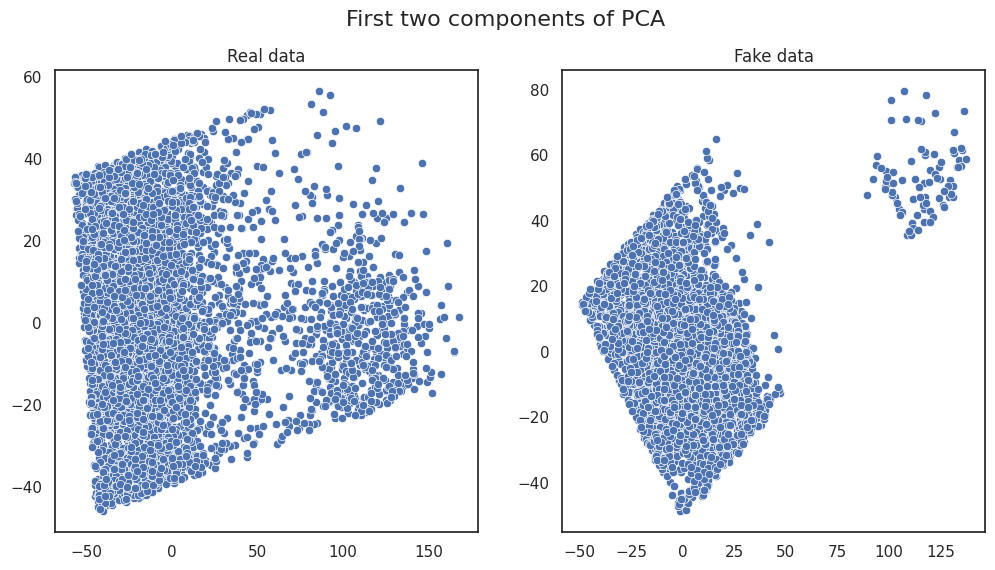

In [ ]:
from table_evaluator import TableEvaluator

cat_cols = ['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status', 'stroke']

table_evaluator_great = TableEvaluator(stroke, great_stroke, cat_cols=cat_cols)
table_evaluator_great.visual_evaluation()

In [ ]:
table_evaluator_great.evaluate(target_col='stroke')


Classifier F1-scores and their Jaccard similarities::
                             f1_real  f1_fake  jaccard_similarity
index                                                            
DecisionTreeClassifier_fake   0.9393   0.9159              0.8414
DecisionTreeClassifier_real   0.8982   0.8620              0.7697
LogisticRegression_fake       0.9550   0.9569              0.9806
LogisticRegression_real       0.9521   0.9227              0.9103
MLPClassifier_fake            0.9550   0.9609              0.9768
MLPClassifier_real            0.9511   0.9374              0.9211
RandomForestClassifier_fake   0.9550   0.9540              0.9673
RandomForestClassifier_real   0.9472   0.9051              0.8839

Privacy results:
                                         result
Duplicate rows between sets (real/fake)  (0, 0)
nearest neighbor mean                    1.2332
nearest neighbor std                     0.3300

Miscellaneous results:
                                  Result
Column Cor

###hepatitisC vs great_custom_hepatitisC

In [ ]:
stroke.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


In [ ]:
great_custom_stroke.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                3832 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   float64
dtypes: float64(4), int64(2), object(5)
memory usage: 439.3+ KB


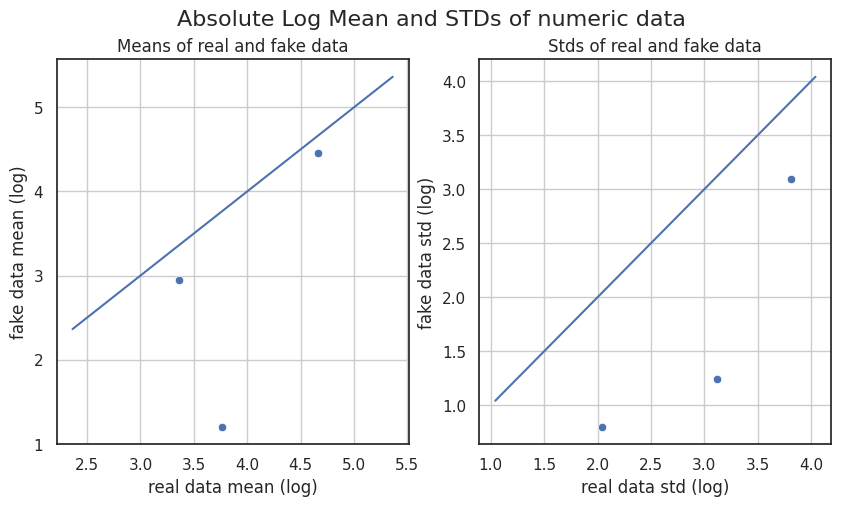

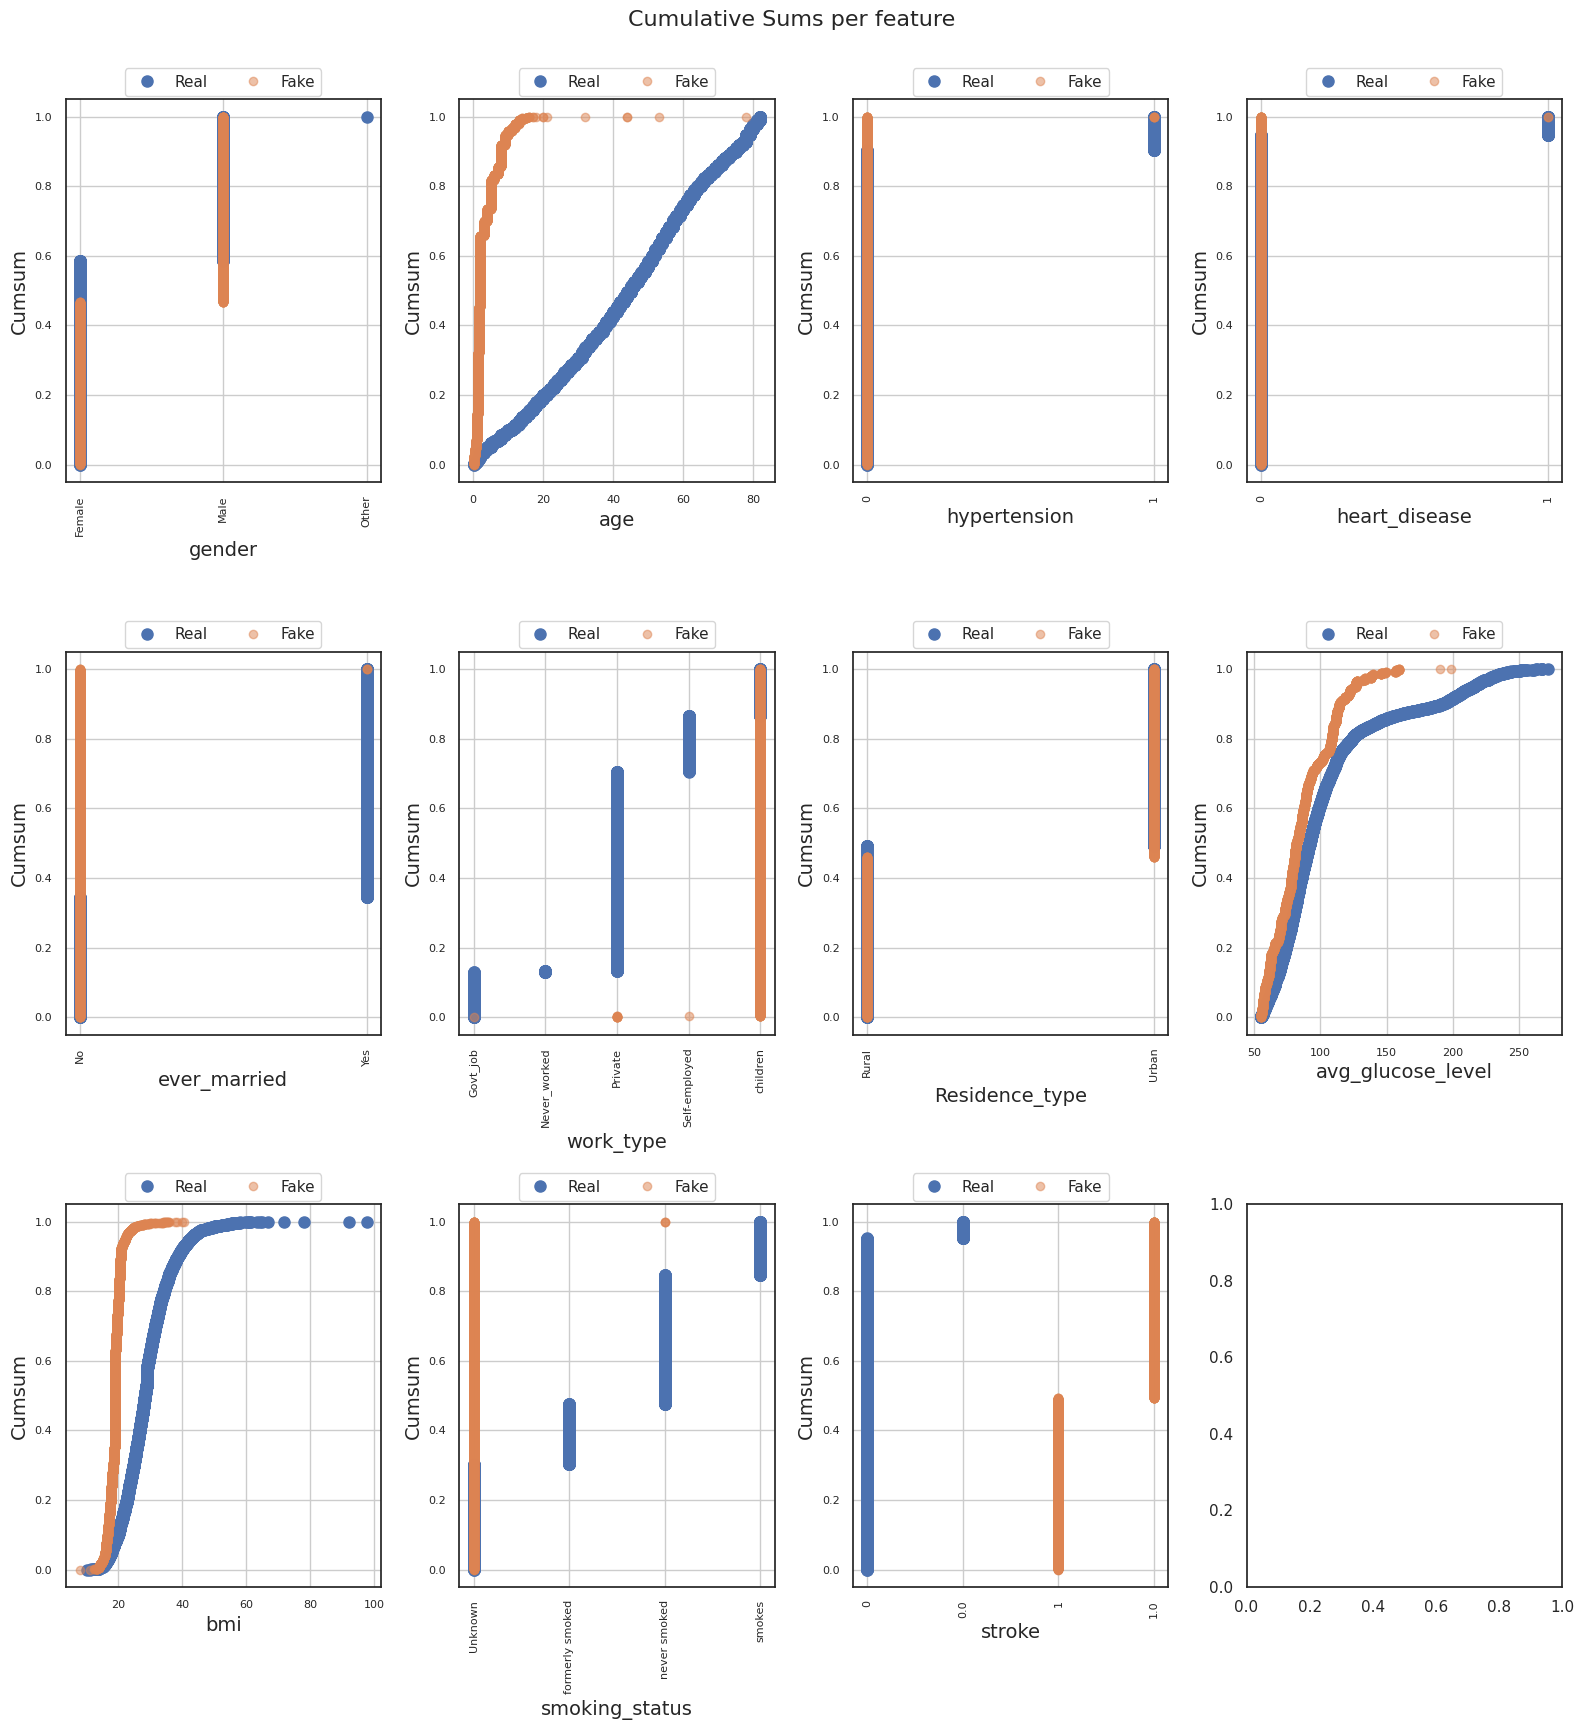

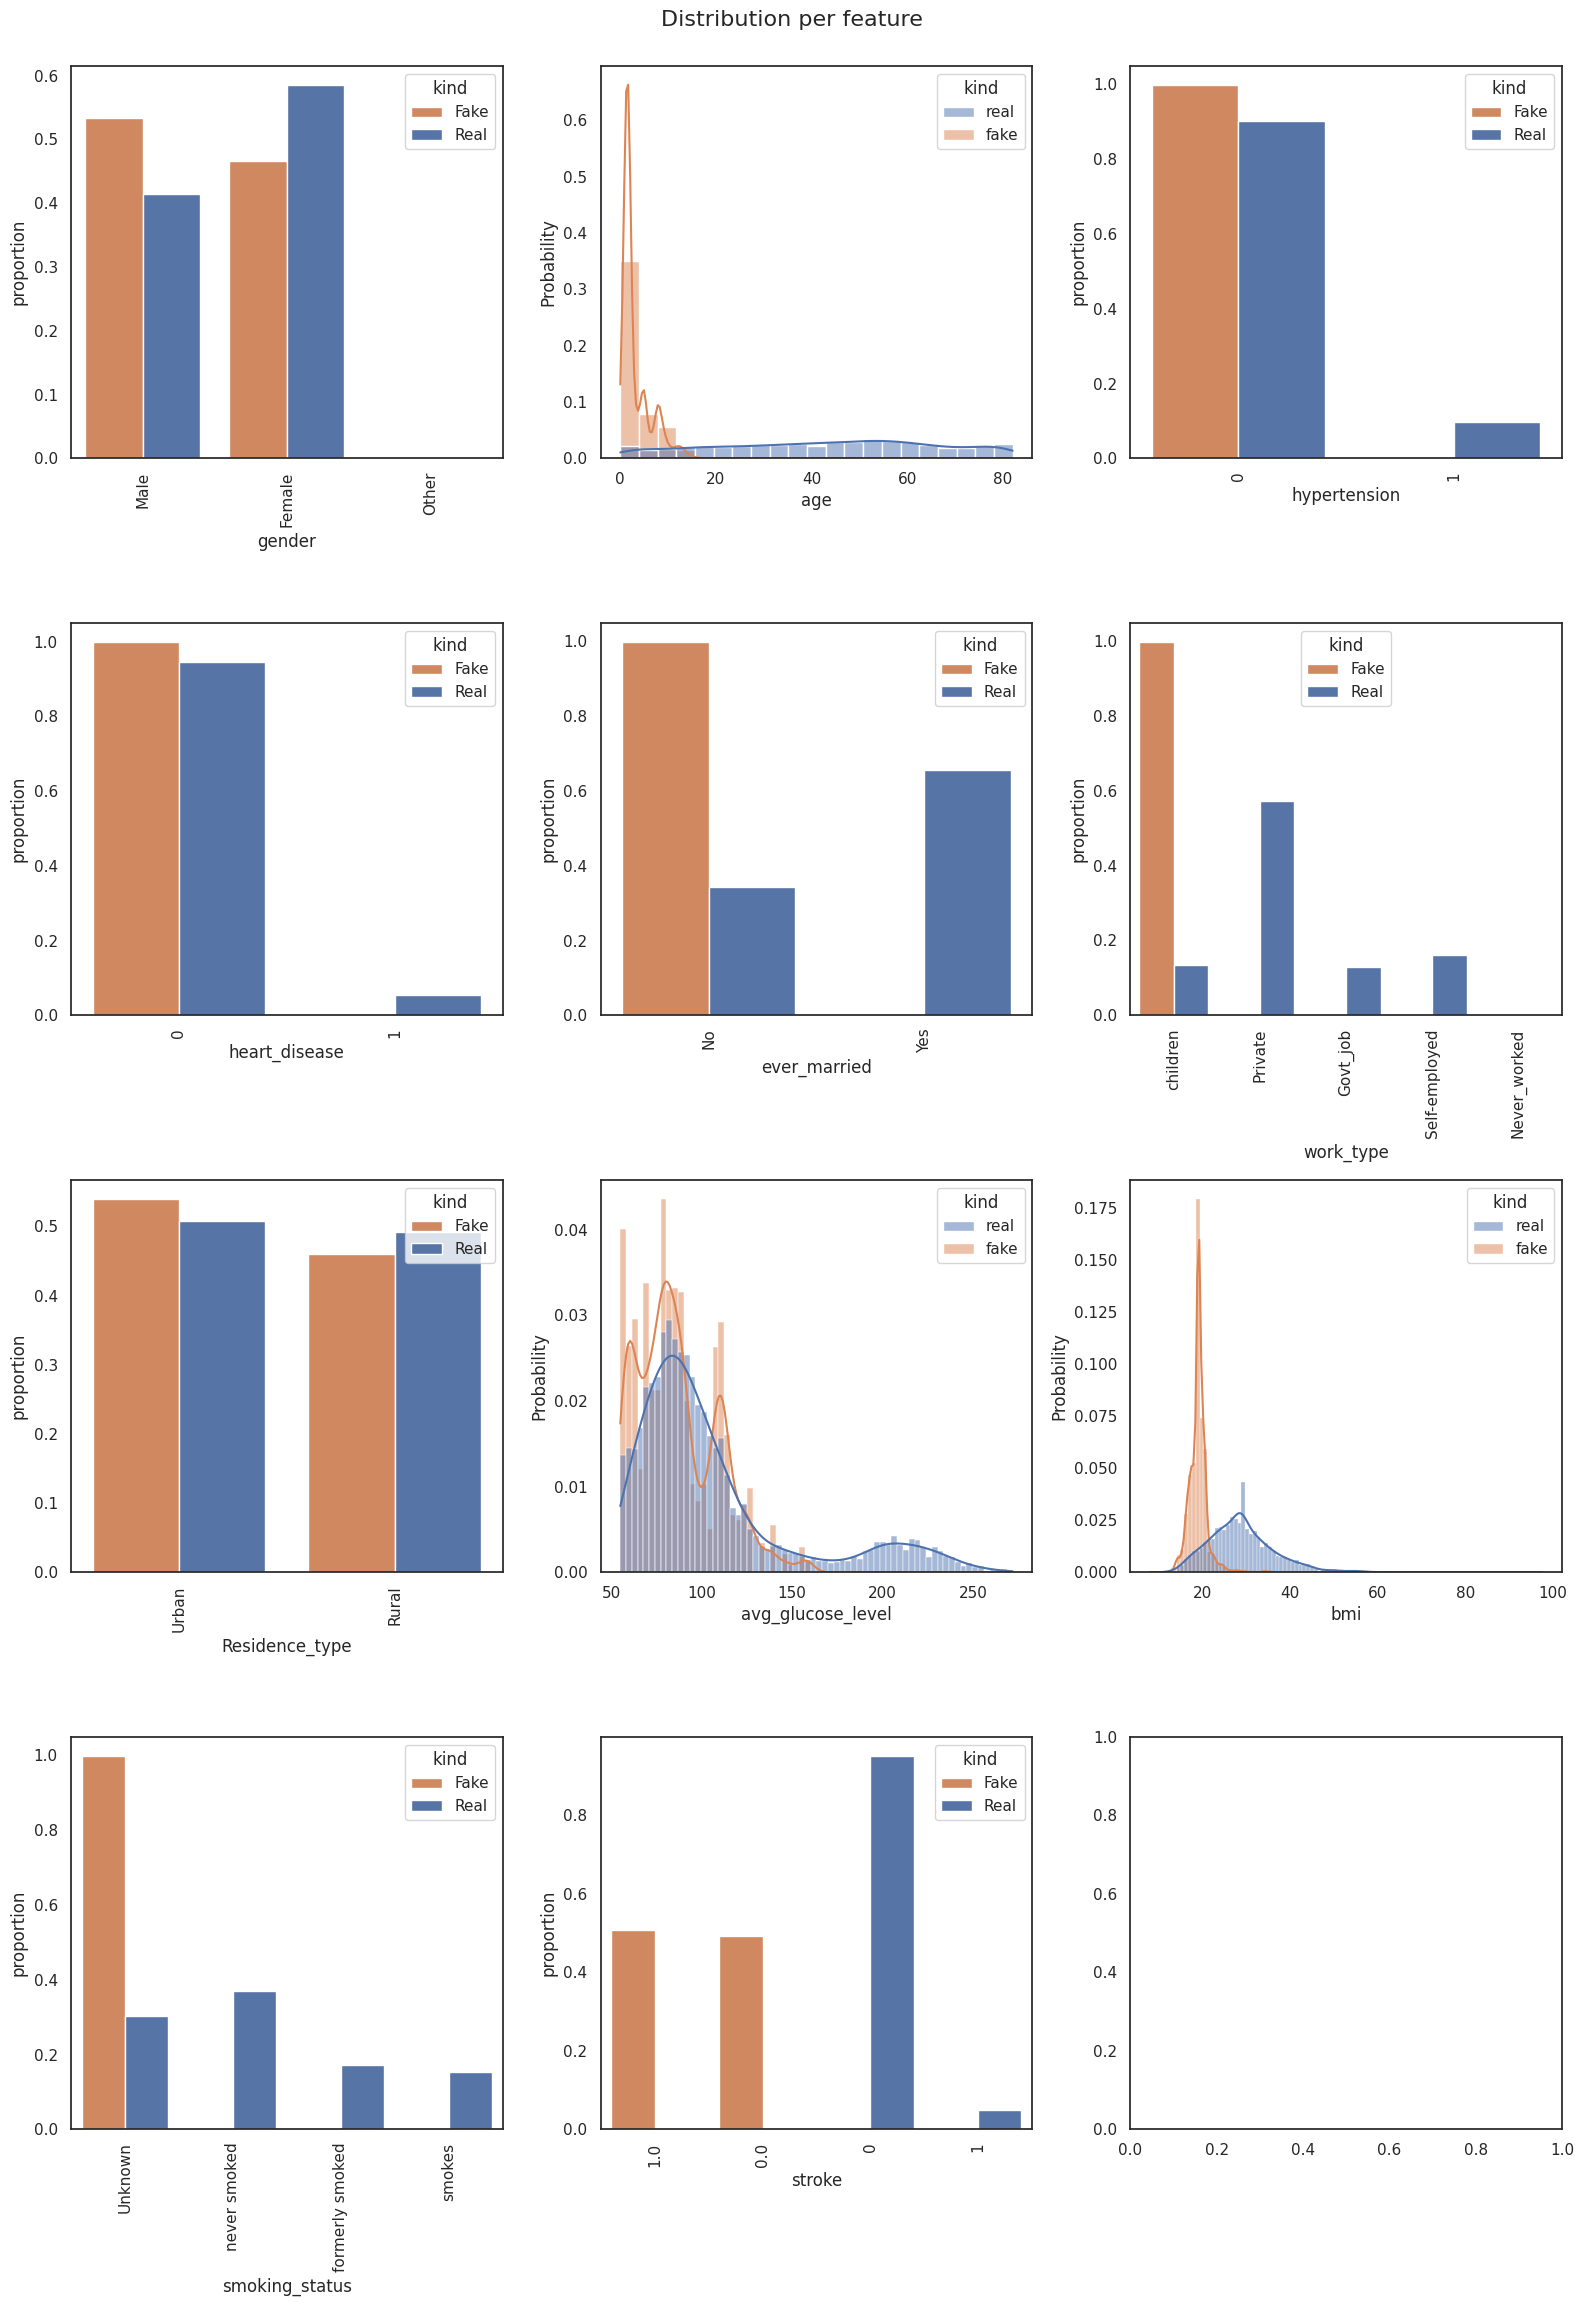

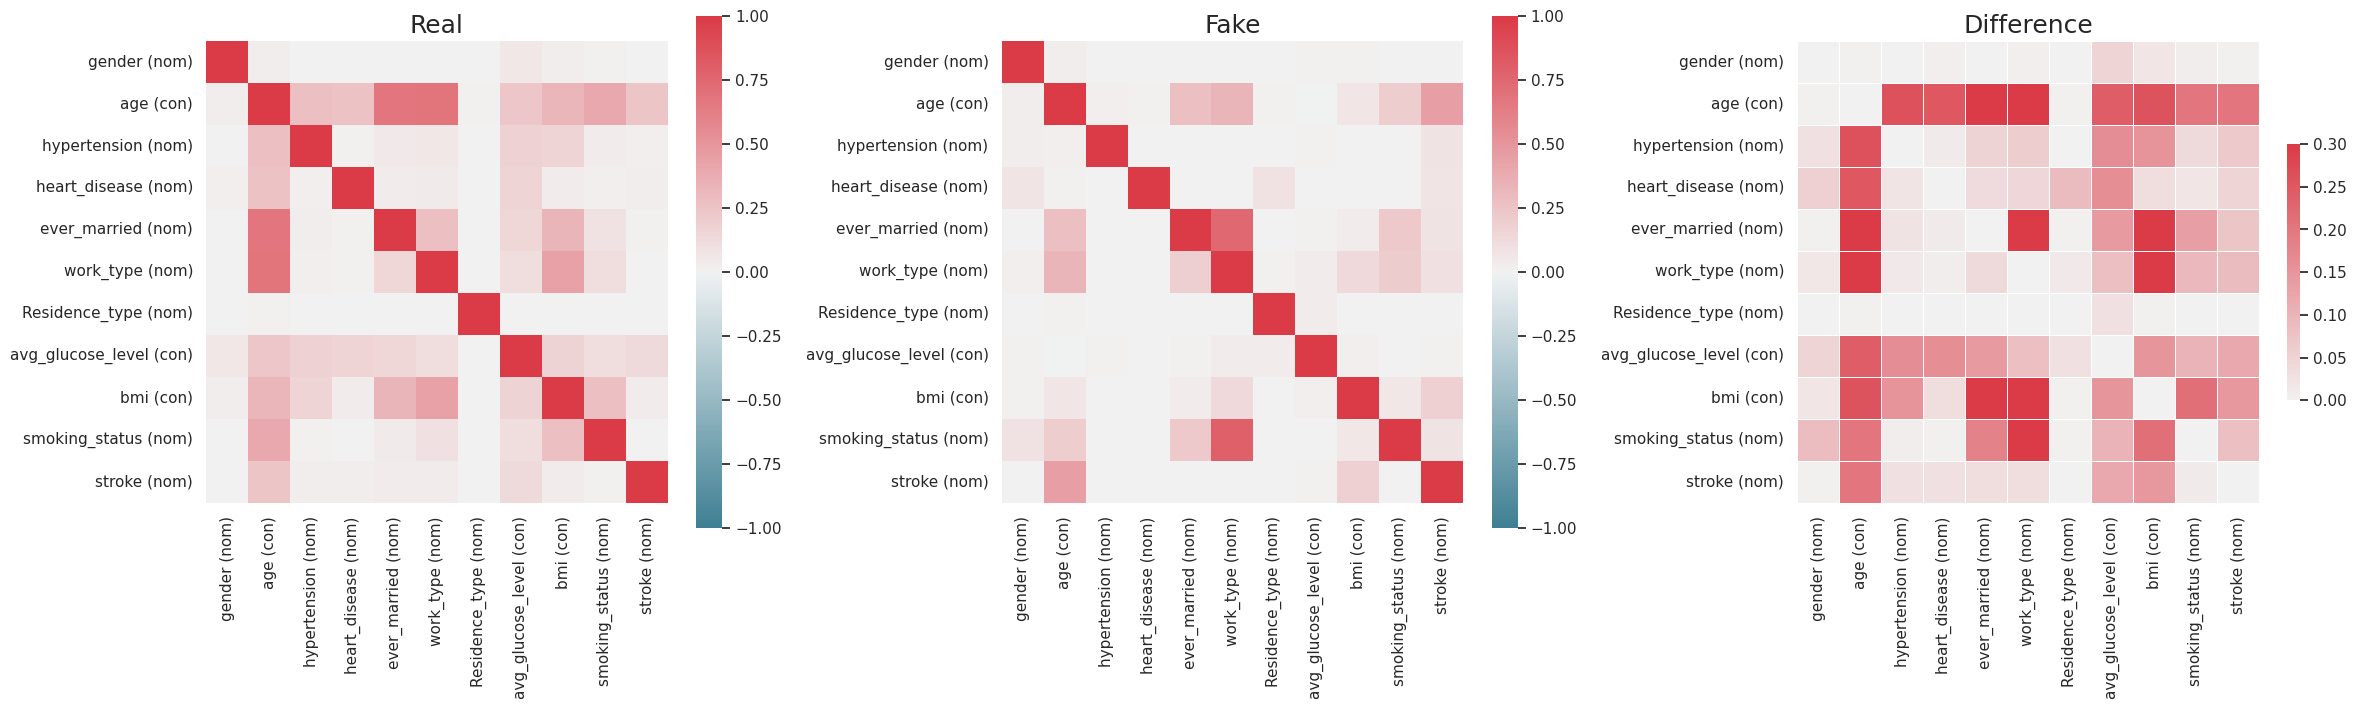

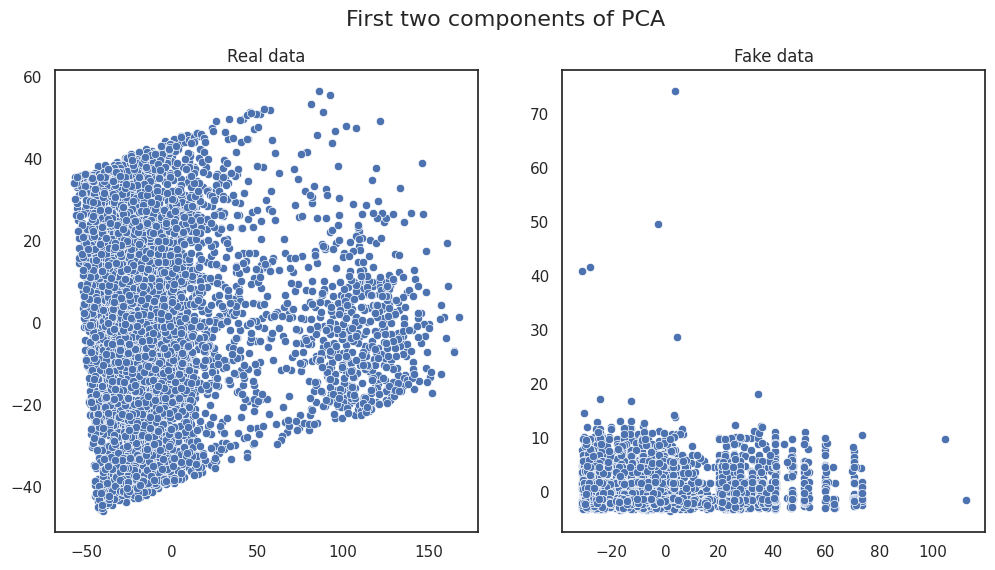

In [ ]:
table_evaluator_great_custom = TableEvaluator(stroke, great_custom_stroke, cat_cols=cat_cols)
table_evaluator_great_custom.visual_evaluation()

In [ ]:
table_evaluator_great_custom.evaluate(target_col='stroke')


Classifier F1-scores and their Jaccard similarities::
                             f1_real  f1_fake  jaccard_similarity
index                                                            
DecisionTreeClassifier_fake   0.4932   0.8552              0.3204
DecisionTreeClassifier_real   0.9207   0.9129              0.8315
LogisticRegression_fake       0.4932   0.7935              0.2218
LogisticRegression_real       0.9569   0.9462              0.9787
MLPClassifier_fake            0.4932   0.8258              0.2617
MLPClassifier_real            0.9560   0.9090              0.8752
RandomForestClassifier_fake   0.4932   0.8787              0.3359
RandomForestClassifier_real   0.9491   0.9432              0.9579

Privacy results:
                                          result
Duplicate rows between sets (real/fake)  (0, 34)
nearest neighbor mean                     2.2343
nearest neighbor std                      0.2704

Miscellaneous results:
                                  Result
Column

###hepatitisC vs ctgans_hepatitisC

In [ ]:
stroke.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


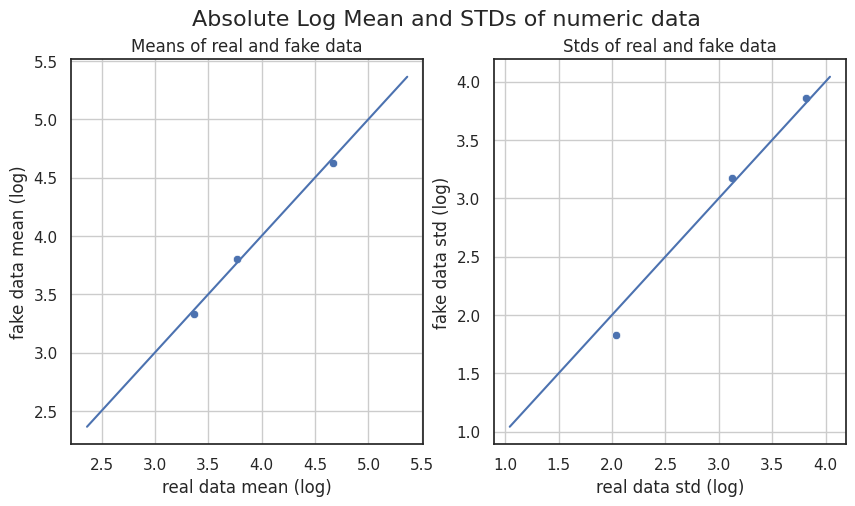

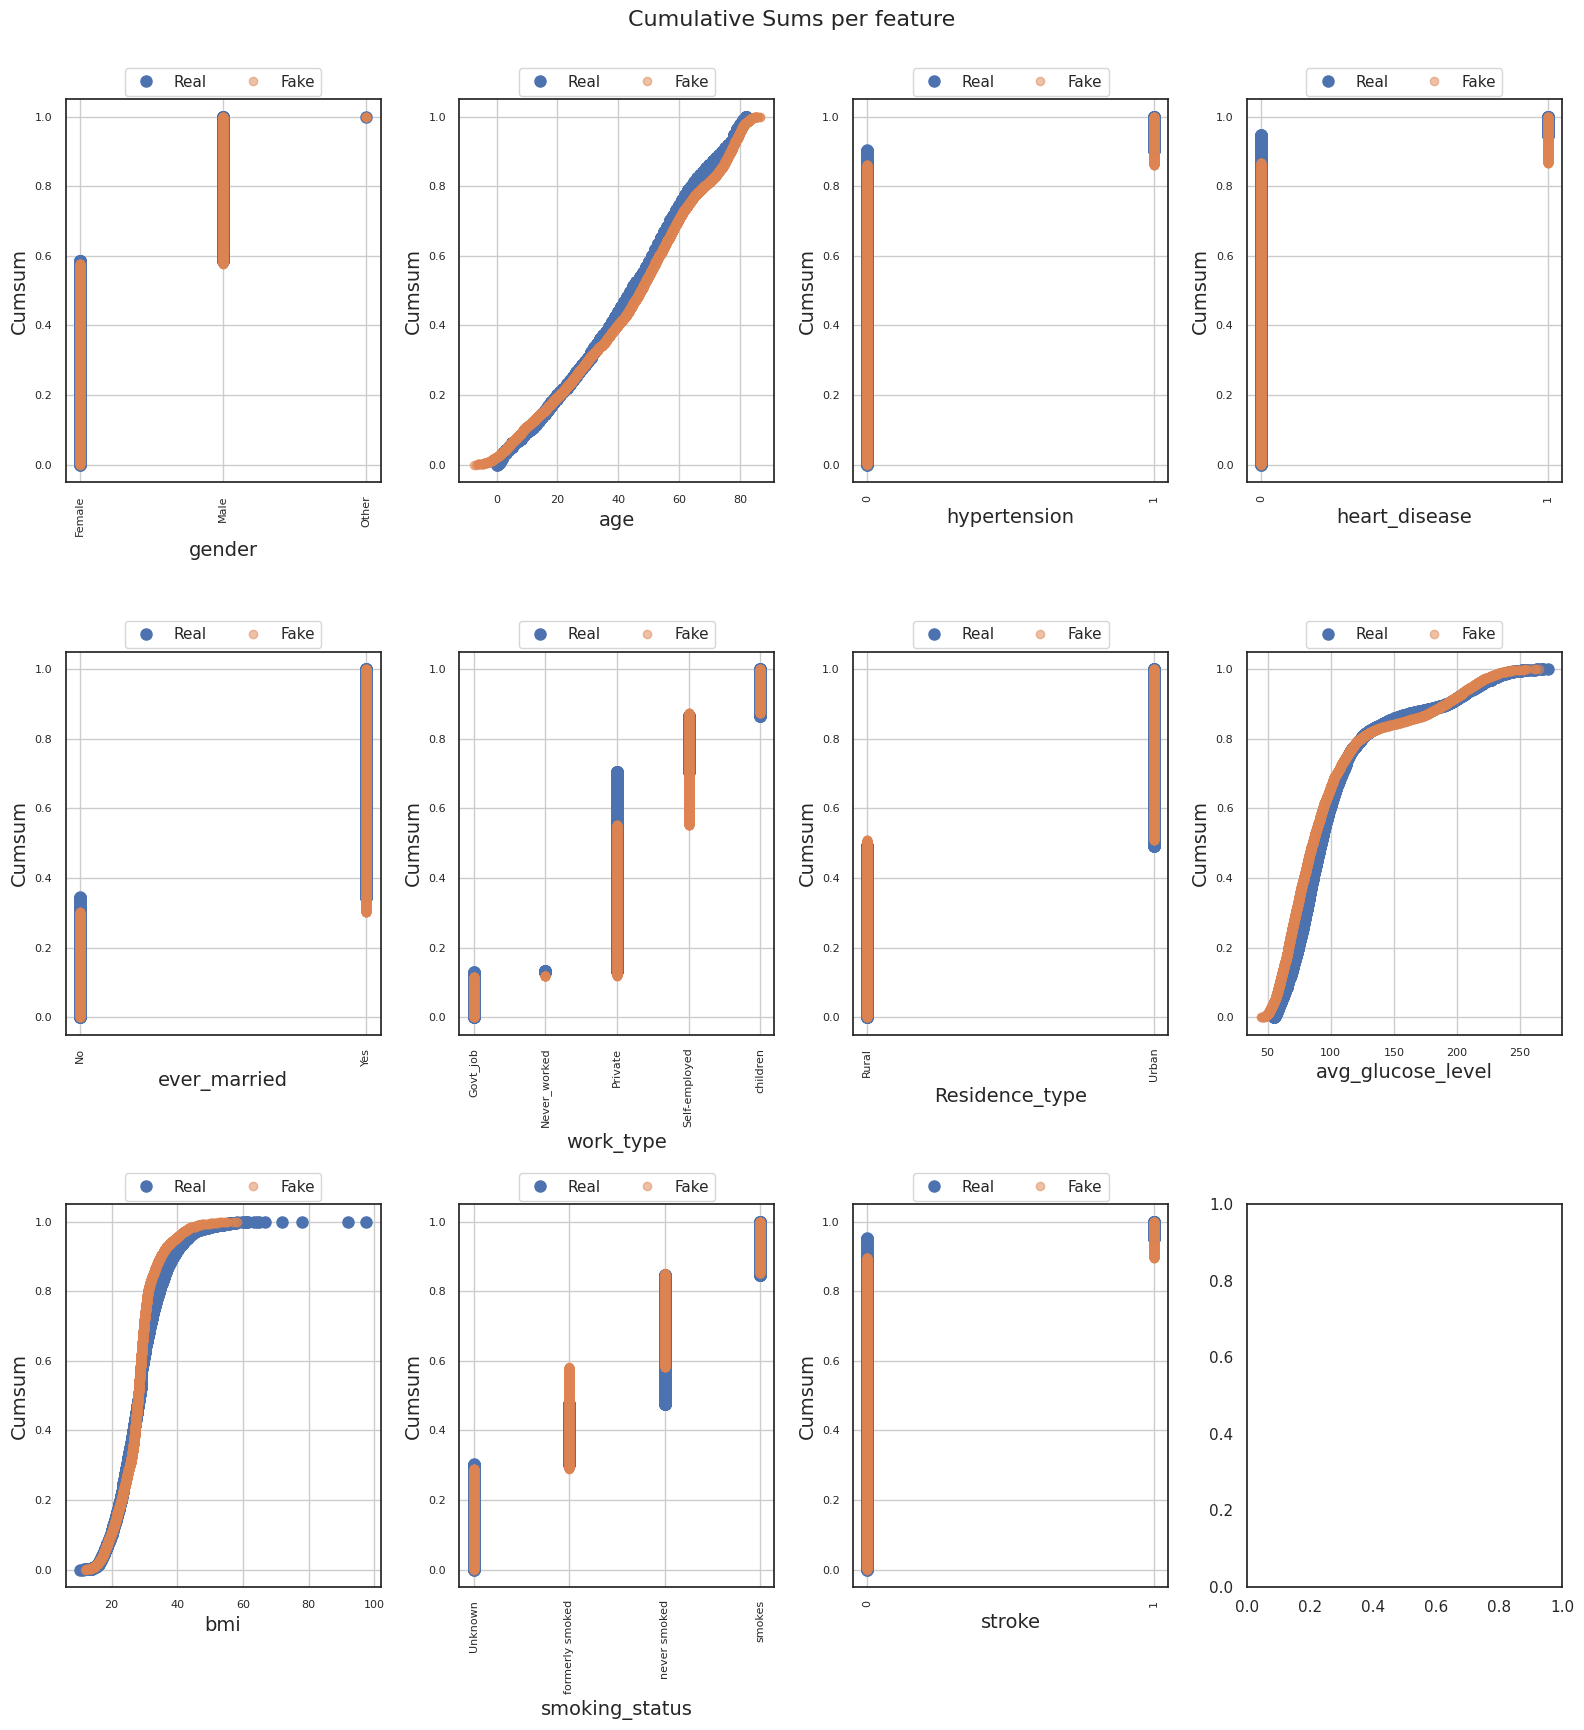

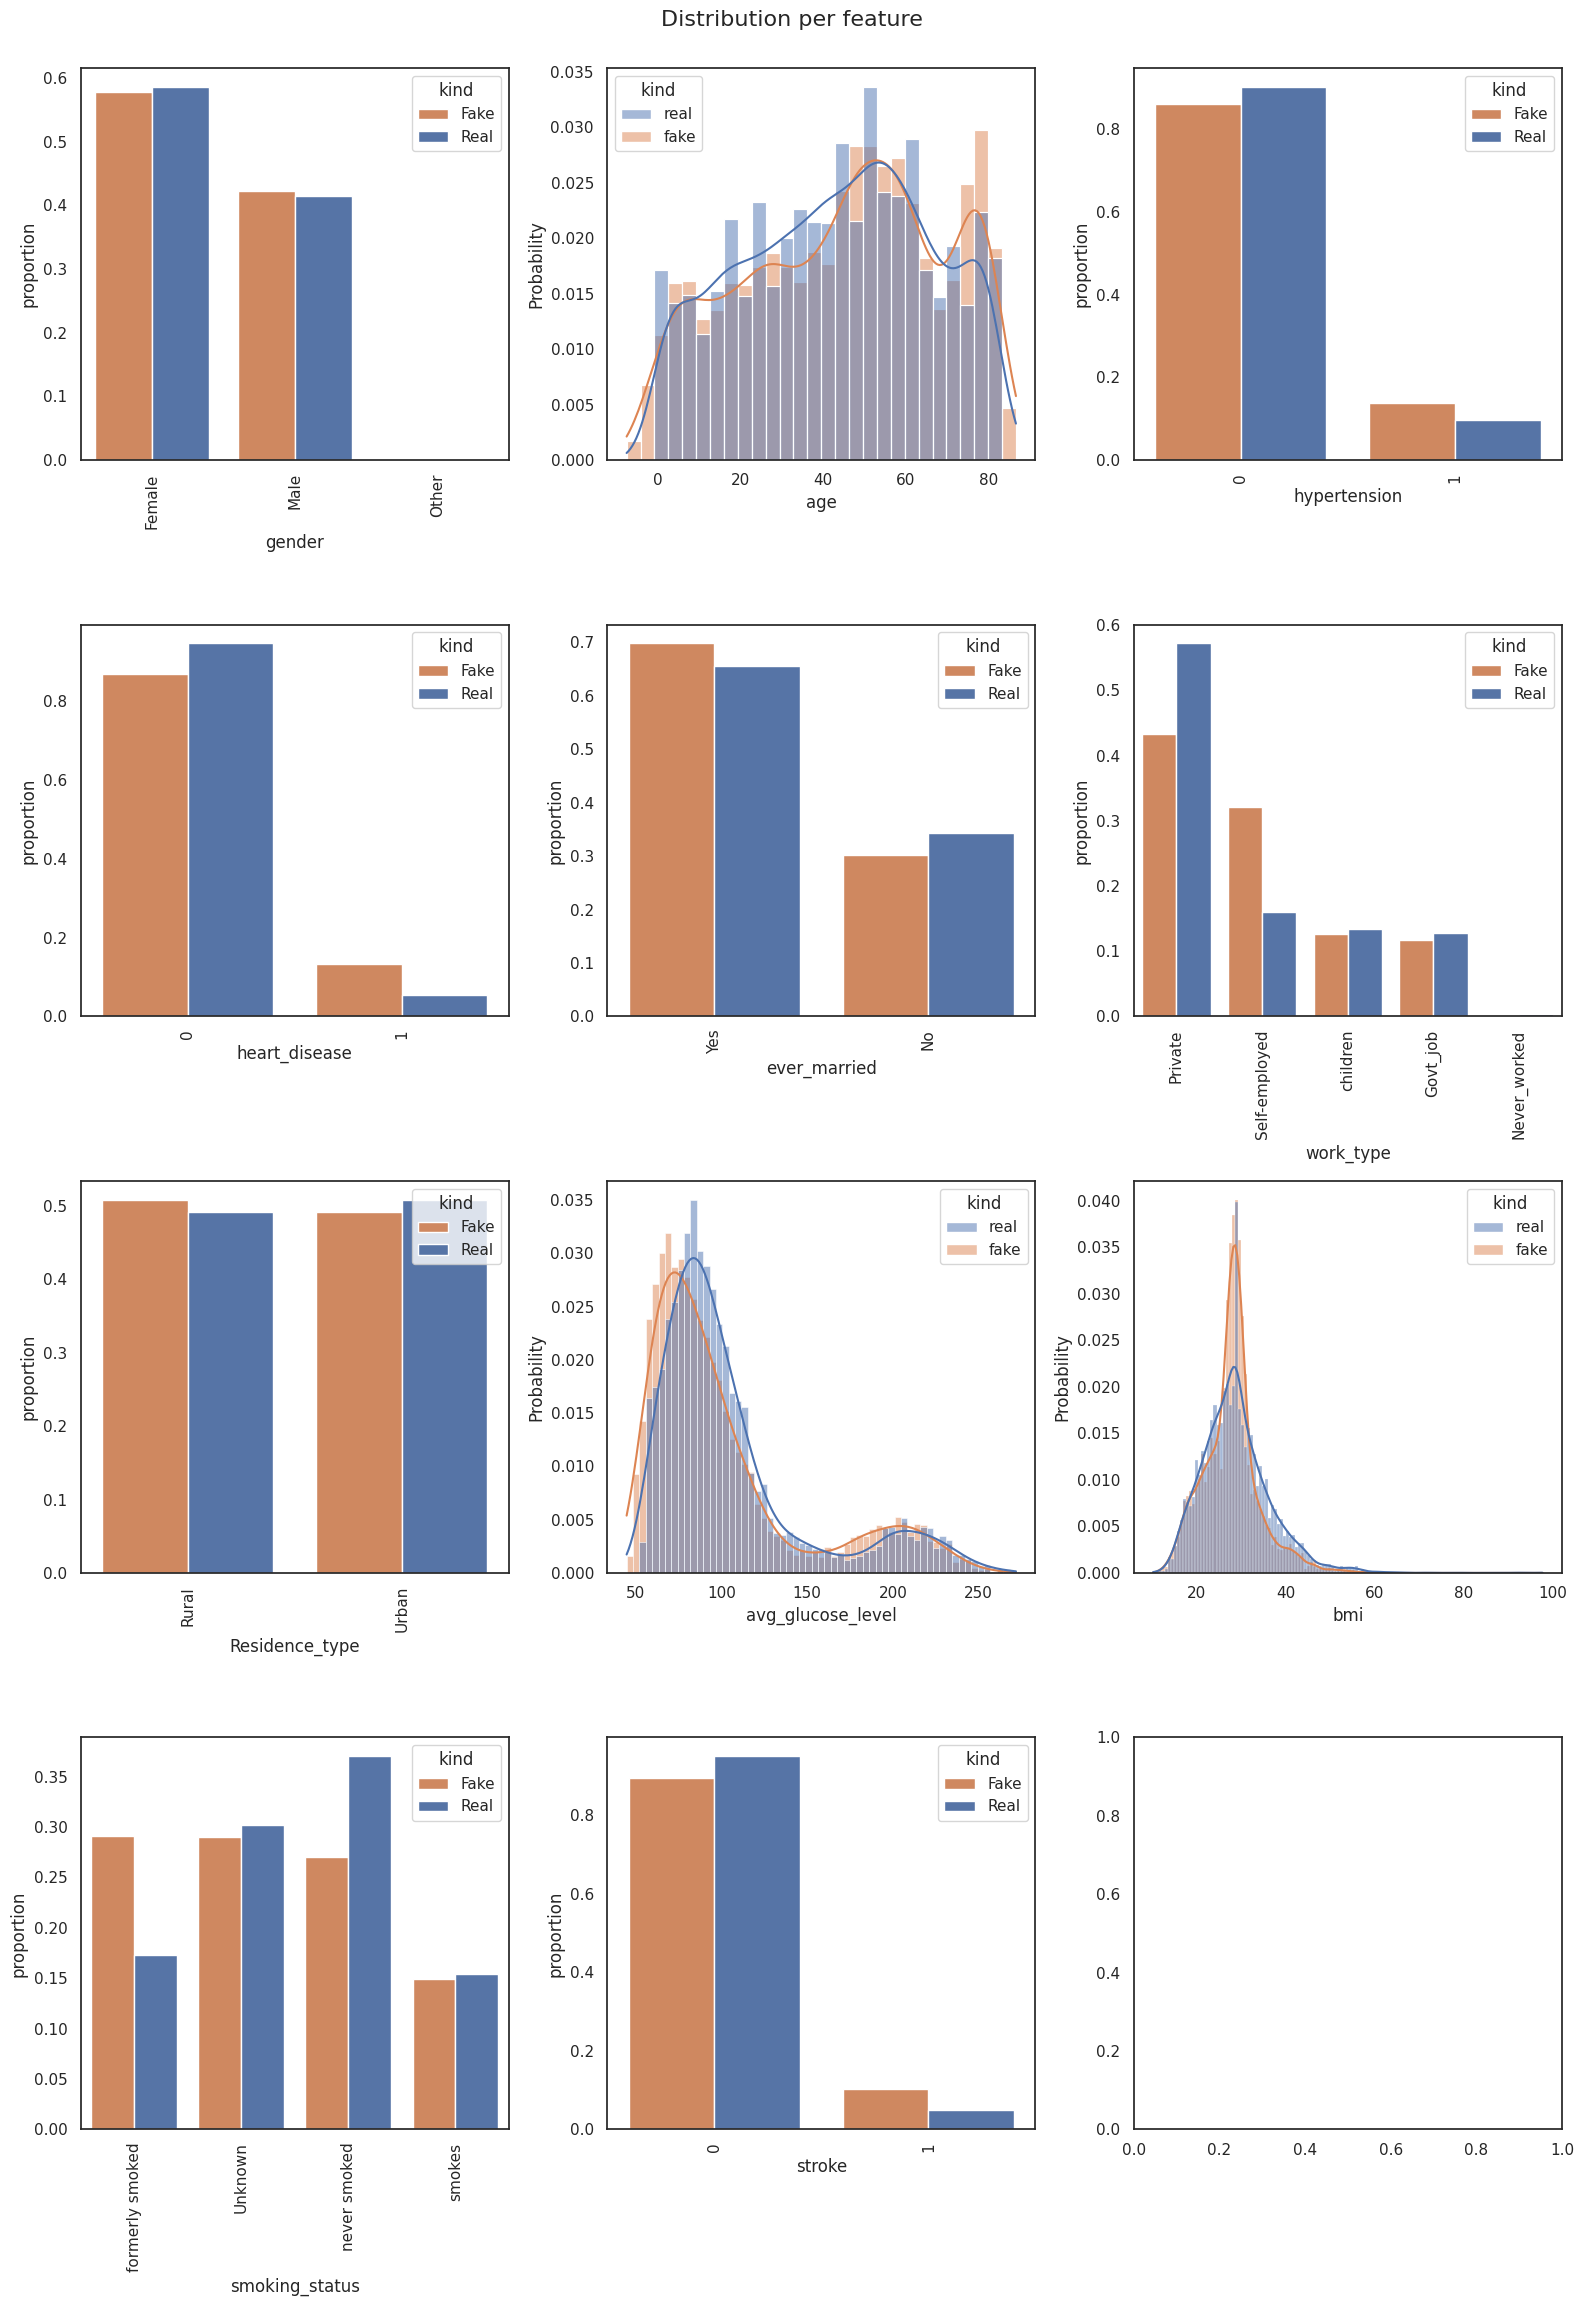

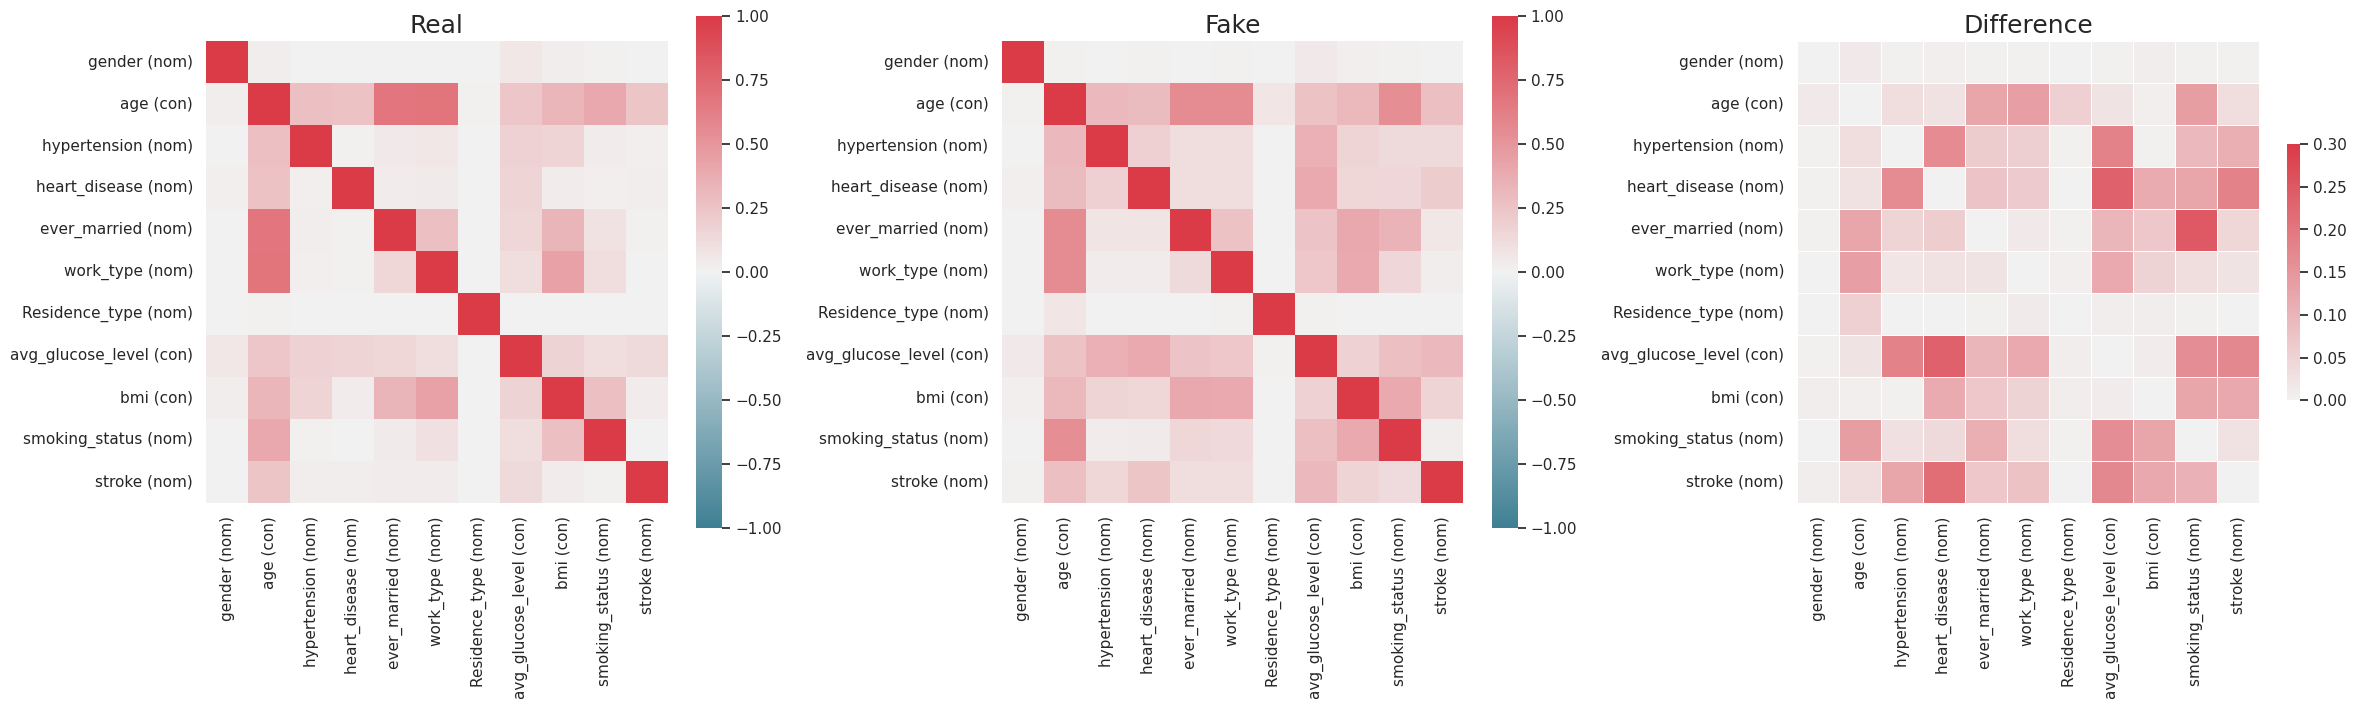

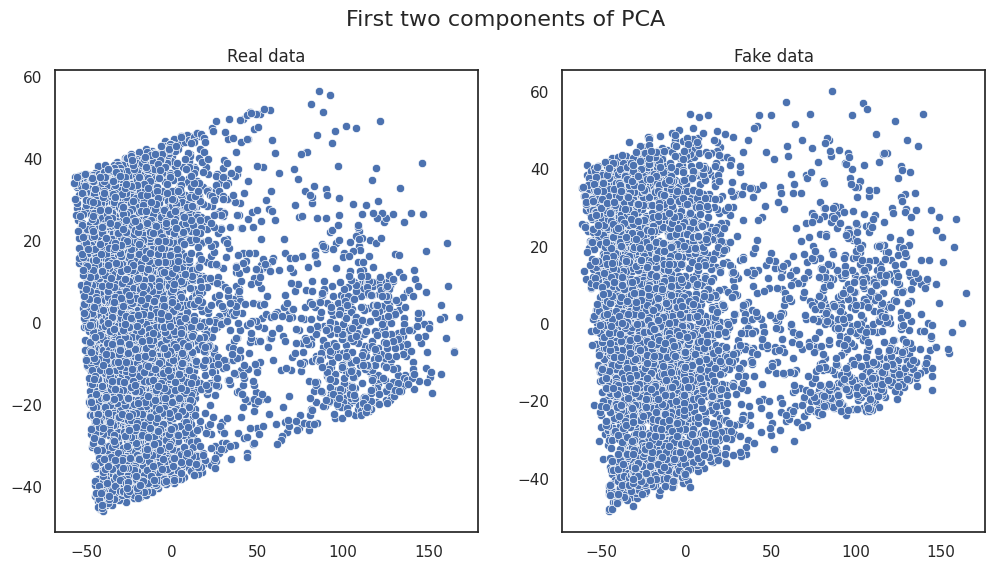

In [ ]:
table_evaluator_ctgans = TableEvaluator(stroke, ctgans_stroke, cat_cols=cat_cols)
table_evaluator_ctgans.visual_evaluation()

In [ ]:
table_evaluator_ctgans.evaluate(target_col='stroke')


Classifier F1-scores and their Jaccard similarities::
                             f1_real  f1_fake  jaccard_similarity
index                                                            
DecisionTreeClassifier_fake   0.8386   0.8718              0.7381
DecisionTreeClassifier_real   0.9207   0.8933              0.8153
LogisticRegression_fake       0.8973   0.9168              0.8856
LogisticRegression_real       0.9569   0.9462              0.9749
MLPClassifier_fake            0.8973   0.9070              0.9067
MLPClassifier_real            0.9560   0.9511              0.9825
RandomForestClassifier_fake   0.8973   0.9041              0.9121
RandomForestClassifier_real   0.9491   0.9452              0.9504

Privacy results:
                                         result
Duplicate rows between sets (real/fake)  (0, 0)
nearest neighbor mean                    0.9815
nearest neighbor std                     0.3490

Miscellaneous results:
                                  Result
Column Cor